In [21]:
# importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
# loading iris dataset 

df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# finding dimensions of the data 

df.shape

(150, 4)

In [4]:
# finding presence of any null value 

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


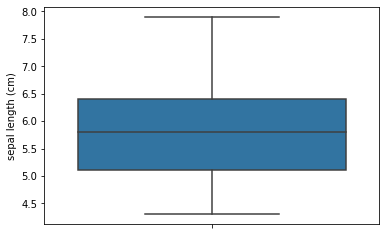

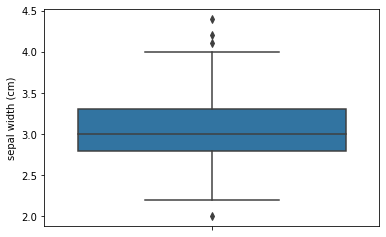

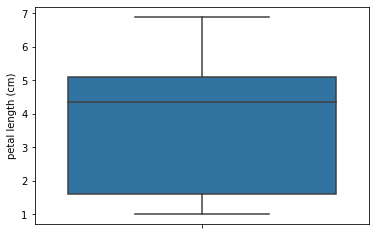

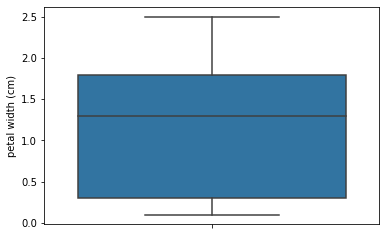

In [6]:
# finding outliers 

cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [7]:
# outliers removal from sepal.width (cm)

q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3-q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape 

(146, 4)

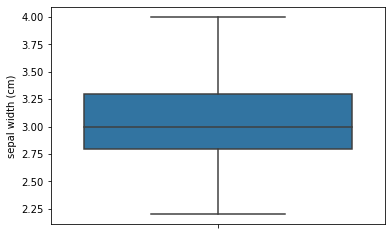

In [8]:
# plotting boxplot after removing outliers 

sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [9]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

In [10]:
# finding optimal number of clusters 
from sklearn.cluster import KMeans

cluster_range = range(1, 20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.578228
4,5,88.896515
5,6,77.815353
6,7,68.094102
7,8,60.975284
8,9,52.691659
9,10,45.795495


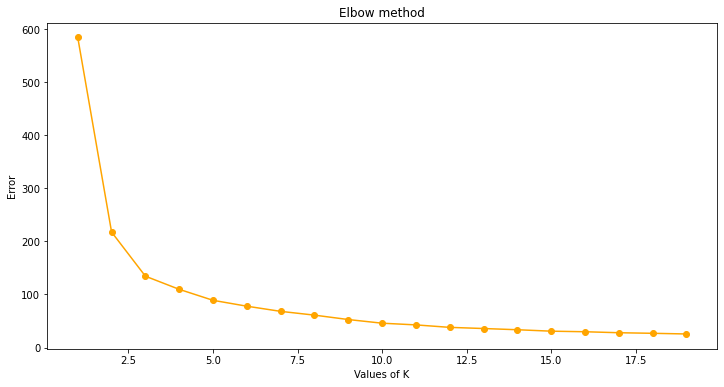

In [11]:
# finding no. of clusters using elbow curve 

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o', color = 'orange')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.title('Elbow method')
plt.show()

In [12]:
model = KMeans(n_clusters = 3, max_iter = 50)

model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [16]:
# creating and fitting model object 

df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis = 1)
df_km.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length in cm':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width in cm':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length in cm':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width in cm':'mean'}))

In [19]:
df2 = pd.concat([pd.Series([0, 1, 2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth], axis = 1)
df2.columns = ['ClusterID', 'sepal length in cm', 'sepal width in cm', 'peta length in cm', 'petal width in cm ']

df2.head()

,ClusterID,sepal length in cm,sepal width in cm,peta length in cm,petal width in cm
0,0,5.916393,2.760656,4.408197,1.440984
1,1,4.976596,3.376596,1.461702,0.246809
2,2,6.850000,3.073684,5.742105,2.071053


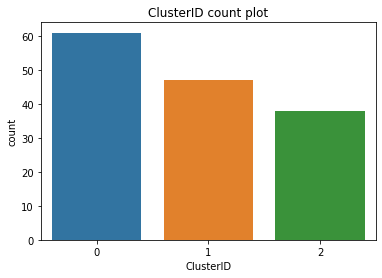

In [25]:
sns.countplot(x=df_km.ClusterID)
plt.title('ClusterID count plot')

plt.show()

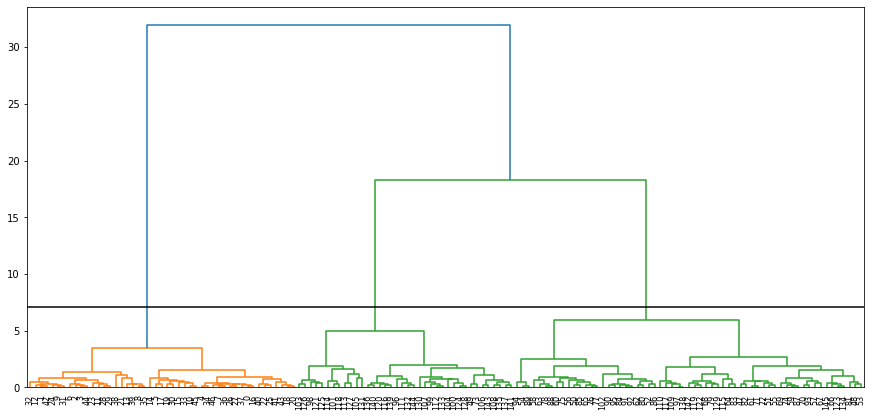

In [27]:
# doing full dendrogram hierarchical clustering 
plt.figure(figsize=(15,7))

mergings = linkage(df_km, method = 'ward', metric = 'euclidean')  # setting cut off to 50
max_d = 7.08
dendrogram(mergings, truncate_mode='lastp', p=150, leaf_rotation = 90., leaf_font_size = 8.)

plt.axhline(y =max_d, c='k')
plt.show()

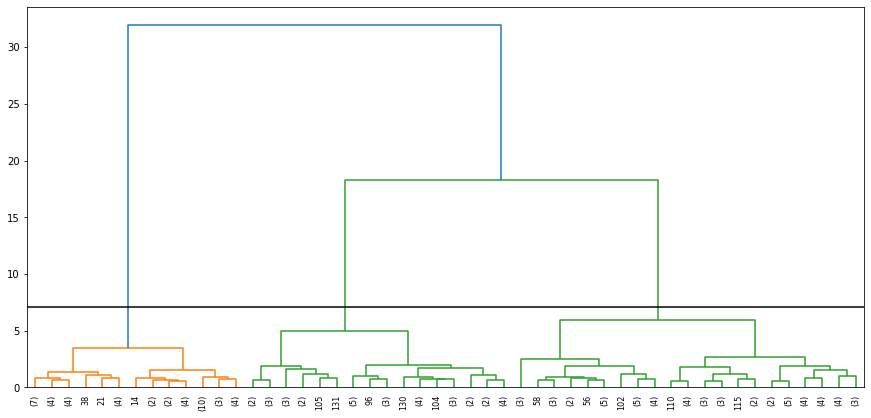

In [28]:
# doing full dendrogram hierarchical clustering (for 50)
plt.figure(figsize=(15,7))

mergings = linkage(df_km, method = 'ward', metric = 'euclidean')  
max_d = 7.08
dendrogram(mergings, truncate_mode='lastp', p=50, leaf_rotation = 90., leaf_font_size = 8.)

plt.axhline(y =max_d, c='k')
plt.show()

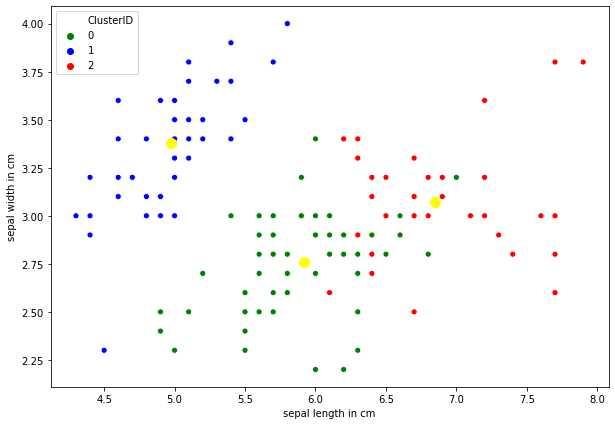

In [29]:
# plotting scatter plot for cluster visualization 
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length in cm', y= 'sepal width in cm', data = df_km, hue='ClusterID', palette = ['green', 'blue', 'red'])

# centroid plotting 

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()